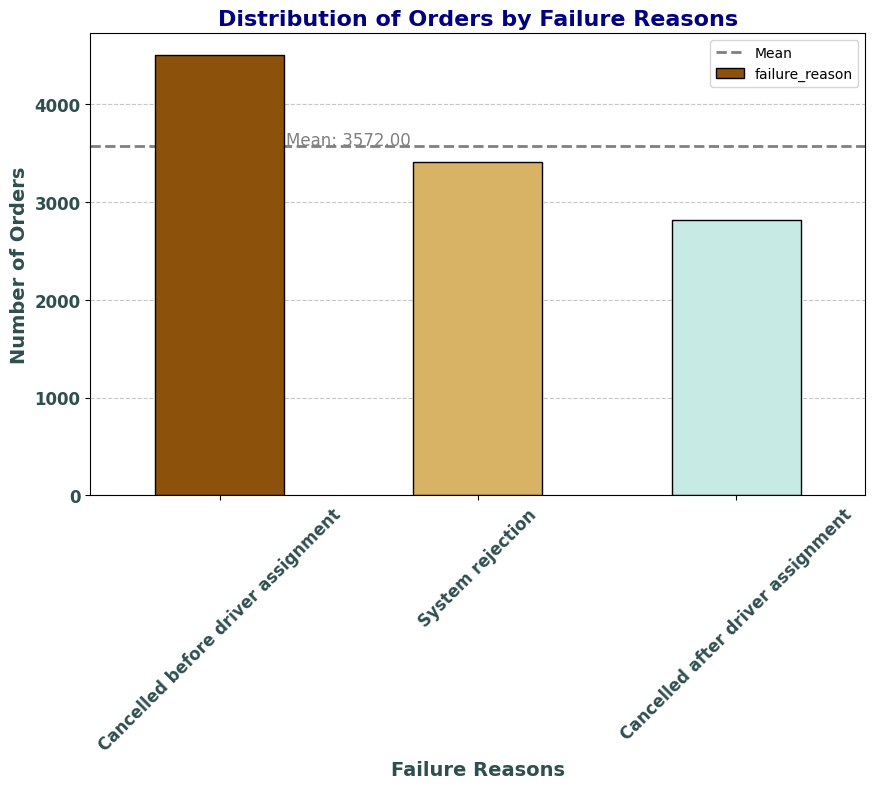

The category with the highest number of orders is: Cancelled before driver assignment


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('/data/lab/STA326_Assignment2/datasets/data_orders.csv')

# 创建分类
data['failure_reason'] = ''
data.loc[(data['order_status_key'] == 4) & (data['is_driver_assigned_key'] == 0), 'failure_reason'] = 'Cancelled before driver assignment'
data.loc[(data['order_status_key'] == 4) & (data['is_driver_assigned_key'] == 1), 'failure_reason'] = 'Cancelled after driver assignment'
data.loc[data['order_status_key'] == 9, 'failure_reason'] = 'System rejection'

order_distribution = data['failure_reason'].value_counts()

colors = ['#8c510a', '#d8b365', '#c7eae5']  
plt.figure(figsize=(10, 6))
order_distribution.plot(kind='bar', color=colors, edgecolor='black', zorder=2)  
plt.title('Distribution of Orders by Failure Reasons', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Failure Reasons', fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel('Number of Orders', fontsize=14, fontweight='bold', color='darkslategray')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='darkslategray')
plt.yticks(fontsize=12, fontweight='bold', color='darkslategray')

mean_value = order_distribution.mean()
plt.axhline(mean_value, color='gray', linestyle='--', linewidth=2, label=f'Mean', zorder=1) 
plt.text(0.5, mean_value + 10, f'Mean: {mean_value:.2f}', color='gray', fontsize=12, ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)  

plt.legend()
plt.show()

highest_category = order_distribution.idxmax()
print(f"The category with the highest number of orders is: {highest_category}")


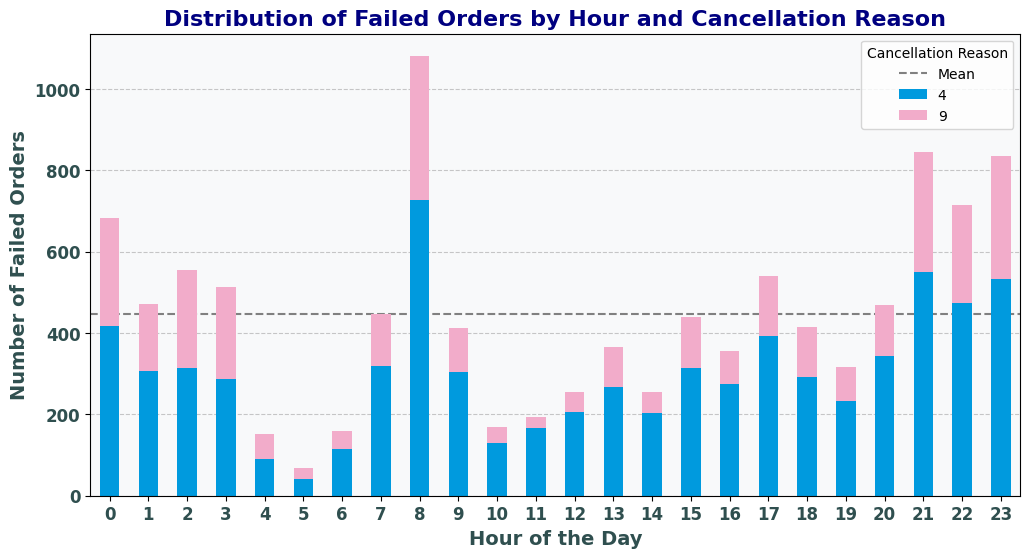

Hours with the biggest fails:
Hour 8: 1082 failed orders in total
Hour 21: 846 failed orders in total
Hour 23: 836 failed orders in total
Hour 22: 716 failed orders in total
Hour 0: 683 failed orders in total


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('/data/lab/STA326_Assignment2/datasets/data_orders.csv')

# Filter out failed orders
failed_orders = data[data['order_status_key'].isin([4, 9])]

# Extract hour from order_datetime
failed_orders['order_datetime'] = pd.to_datetime(failed_orders['order_datetime'])
failed_orders['order_hour'] = failed_orders['order_datetime'].dt.hour

# Group by hour and failure category
hourly_failure_distribution = failed_orders.groupby(['order_hour', 'order_status_key']).size().unstack(fill_value=0)

# Plot the distribution with custom colors
colors = ['#009ADE', '#F2ACCA']
ax = hourly_failure_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors, zorder=2)

# Calculate mean failed orders across all hours
mean_failed_orders = hourly_failure_distribution.sum(axis=1).mean()

# Add horizontal line for mean value
plt.axhline(y=mean_failed_orders, color='gray', linestyle='--', label=f'Mean', zorder=1)

# Customize plot aesthetics
plt.title('Distribution of Failed Orders by Hour and Cancellation Reason', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Hour of the Day', fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel('Number of Failed Orders', fontsize=14, fontweight='bold', color='darkslategray')
plt.xticks(rotation=0, fontsize=12, fontweight='bold', color='darkslategray')
plt.yticks(fontsize=12, fontweight='bold', color='darkslategray')
plt.legend(title='Cancellation Reason', loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Adjust background color
plt.gca().set_facecolor('#F8F9FA')

# Show plot
plt.show()

# Analyze the results
print("Hours with the biggest fails:")
for hour, count in hourly_failure_distribution.sum(axis=1).nlargest(5).items():
    print(f"Hour {hour}: {count} failed orders in total")


In [4]:
#conclusion 2
print("Hour 8 Explanation: Hour 8 likely experiences a surge in demand due to morning rush hours, with many people commuting to work or traveling for business. This increased demand may outpace the available supply of drivers, leading to a higher number of failed orders. Explanation for Other Hours: Hours 21, 23, 22, and 0 also exhibit relatively high numbers of failed orders. This could be attributed to peak hours during evenings or late nights when people are returning home from work or social activities. The increased demand during these hours may exceed the supply of available drivers, resulting in a higher rate of failed orders.")
print("In conclusion, Hour 8 appears to be the biggest contributor to failed orders, likely due to the morning rush hour. Other hours with high failed order counts may experience increased demand during evening or late-night peak periods, leading to supply shortages and subsequent failed orders.")

Hour 8 Explanation: Hour 8 likely experiences a surge in demand due to morning rush hours, with many people commuting to work or traveling for business. This increased demand may outpace the available supply of drivers, leading to a higher number of failed orders. Explanation for Other Hours: Hours 21, 23, 22, and 0 also exhibit relatively high numbers of failed orders. This could be attributed to peak hours during evenings or late nights when people are returning home from work or social activities. The increased demand during these hours may exceed the supply of available drivers, resulting in a higher rate of failed orders.
In conclusion, Hour 8 appears to be the biggest contributor to failed orders, likely due to the morning rush hour. Other hours with high failed order counts may experience increased demand during evening or late-night peak periods, leading to supply shortages and subsequent failed orders.


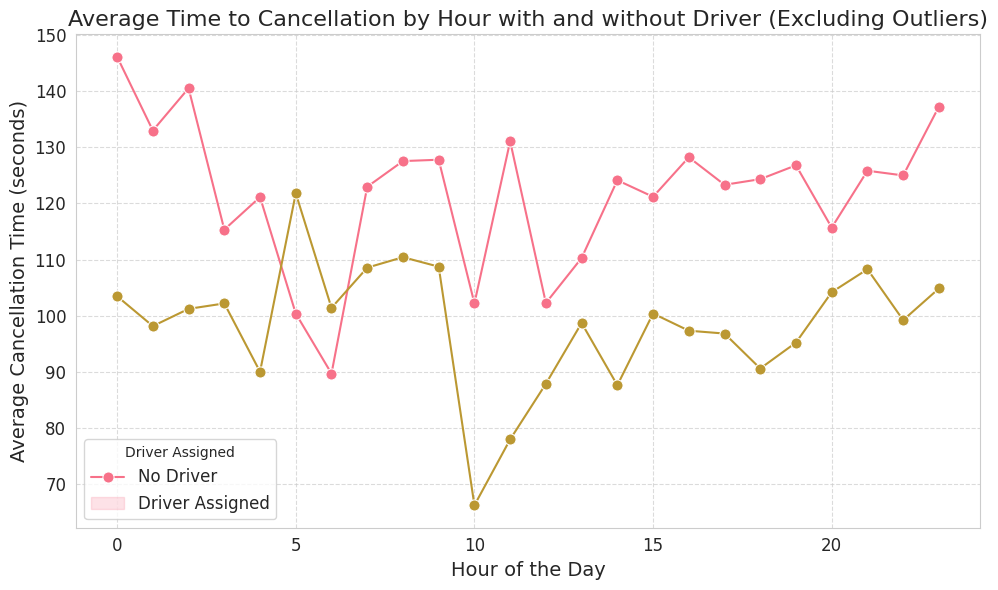

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/data/lab/STA326_Assignment2/datasets/data_orders.csv')

# Convert order_datetime column to datetime
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

# Extract hour from order_datetime
df['hour'] = df['order_datetime'].dt.hour

# Filter out rows where order_status_key is not 4 (cancelled by client) or 9 (cancelled by system)
df = df[df['order_status_key'].isin([4, 9])]

# Convert is_driver_assigned_key to boolean
df['is_driver_assigned'] = df['is_driver_assigned_key'].map({0: 'No Driver', 1: 'Driver Assigned'})

# Remove outliers using Interquartile Range (IQR) method
Q1 = df['cancellations_time_in_seconds'].quantile(0.25)
Q3 = df['cancellations_time_in_seconds'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['cancellations_time_in_seconds'] < (Q1 - 1.5 * IQR)) | (df['cancellations_time_in_seconds'] > (Q3 + 1.5 * IQR)))]

# Group by hour and is_driver_assigned, calculate average cancellation time
avg_cancel_time = df.groupby(['hour', 'is_driver_assigned'])['cancellations_time_in_seconds'].mean().reset_index()

# Set seaborn style
sns.set_style("whitegrid")

# Set color palette
sns.set_palette("husl")

# Plot using seaborn with data points
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_cancel_time, x='hour', y='cancellations_time_in_seconds', hue='is_driver_assigned', marker='o', markersize=8)  # Add marker='o' for data points
plt.title('Average Time to Cancellation by Hour with and without Driver (Excluding Outliers)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Cancellation Time (seconds)', fontsize=14)
plt.legend(title='Driver Assigned', labels=['No Driver', 'Driver Assigned'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [6]:
#conclusion 3

print("At 5 o 'clock and 6 o 'clock, the order cancellation value of drivers is greater than the order cancellation value without drivers, so it can be inferred that the number of drivers is large and the order demand is small during this period. From 00:00 to 3:00, the order cancellation value with a driver is much higher than the order cancellation value without a driver. During this period, the number of drivers is small, and the customer cancels the order because the driver cannot be matched. The cancellation value of orders with drivers at 10 o 'clock is the lowest, which may be due to the morning peak, which is the peak time for customers to use cars. Order cancellation values without drivers are generally higher than those assigned by drivers.")

At 5 o 'clock and 6 o 'clock, the order cancellation value of drivers is greater than the order cancellation value without drivers, so it can be inferred that the number of drivers is large and the order demand is small during this period. From 00:00 to 3:00, the order cancellation value with a driver is much higher than the order cancellation value without a driver. During this period, the number of drivers is small, and the customer cancels the order because the driver cannot be matched. The cancellation value of orders with drivers at 10 o 'clock is the lowest, which may be due to the morning peak, which is the peak time for customers to use cars. Order cancellation values without drivers are generally higher than those assigned by drivers.


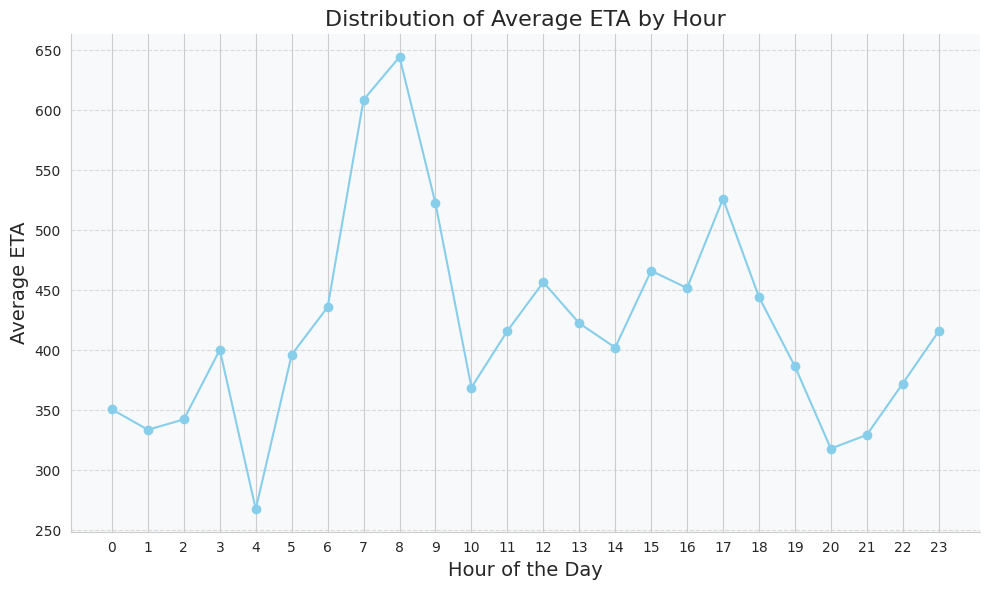

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined
# Convert order_datetime column to datetime
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

# Extract hour from order_datetime
df['hour'] = df['order_datetime'].dt.hour

# Group by hour and calculate average ETA
avg_eta_by_hour = df.groupby('hour')['m_order_eta'].mean()

# Plot distribution of average ETA by hours
plt.figure(figsize=(10, 6))

# Plot the line
plt.plot(avg_eta_by_hour.index, avg_eta_by_hour.values, marker='o', color='skyblue', linestyle='-')

# Add title and labels
plt.title('Distribution of Average ETA by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average ETA', fontsize=14)

# Set x-axis ticks
plt.xticks(avg_eta_by_hour.index)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize background color
plt.gca().set_facecolor('#F8F9FA')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [8]:
#conclusion 4
print("It can be seen from the figure above that ETA time from 7 to 9 is in a peak value, which may be due to the morning travel peak. And 17-18 is the evening peak, at another peak. The ETA time at 4 o 'clock is the shortest, when people go out less and there are more drivers, so the ETA time is short.")

It can be seen from the figure above that ETA time from 7 to 9 is in a peak value, which may be due to the morning travel peak. And 17-18 is the evening peak, at another peak. The ETA time at 4 o 'clock is the shortest, when people go out less and there are more drivers, so the ETA time is short.


In [9]:
import pandas as pd
import folium
import h3

# Assuming df is your DataFrame containing the orders data
# Drop rows with missing latitude or longitude values
df = df.dropna(subset=['origin_latitude', 'origin_longitude'])

# Initialize the hexagon size to 8
hex_size = 8

# Convert latitude and longitude coordinates to H3 hexagons of size 8
df['h3_hex'] = df.apply(lambda row: h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], hex_size), axis=1)

# Count the number of orders in each H3 hexagon
hex_counts = df['h3_hex'].value_counts().reset_index()
hex_counts.columns = ['h3_hex', 'order_count']

# Sort the hexagons by the number of orders they contain
hex_counts = hex_counts.sort_values(by='order_count', ascending=False)

# Calculate the cumulative percentage of orders
hex_counts['cumulative_percentage'] = hex_counts['order_count'].cumsum() / hex_counts['order_count'].sum()

# Select hexagons containing 80% of all orders
selected_hexes = hex_counts[hex_counts['cumulative_percentage'] <= 0.8]

# Create a folium map centered around the median latitude and longitude of orders
map_center = [df['origin_latitude'].median(), df['origin_longitude'].median()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Add hexagons to the map, coloring them by the number of orders
for index, row in selected_hexes.iterrows():
    hexagon = row['h3_hex']
    order_count = row['order_count']
    # Get the vertices of the hexagon
    vertices = h3.h3_to_geo_boundary(hexagon)
    # Create a folium polygon for each hexagon
    folium.Polygon(locations=vertices, fill_color='red', fill_opacity=0.7, color='black', popup=f'Orders: {order_count}').add_to(mymap)

# Save the map as an HTML file
mymap.save("hex_map.html")

# Display the map
mymap
